<a href="https://colab.research.google.com/github/anuragrpatil/NeuroAttention/blob/master/NeuroAttention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab  idiosyncrasies

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
cd "/content/drive//My Drive/NeuroAttention/speechmodeltutorial"

/content/drive/My Drive/NeuroAttention/speechmodeltutorial


# Imports

In [0]:
# Run this cell if your computer has a 'retina' display. It will make the figures look much nicer.
%config InlineBackend.figure_format = 'retina'

In [0]:
from matplotlib.pyplot import figure, cm
import numpy as np
import logging
logging.basicConfig(level=logging.DEBUG)

In [5]:
!pip install transformers
!pip install pytorch-pretrained-bert

     |████████████████████████████████| 573kB 3.4MB/s 
     |████████████████████████████████| 3.7MB 47.6MB/s 
     |████████████████████████████████| 1.0MB 49.9MB/s 
     |████████████████████████████████| 870kB 51.4MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.38-cp36-none-any.whl size=884628 sha256=256e1918b357d09f816bff6872c10b0f68096b33b397e386fa22b446492b423f
  Stored in directory: /root/.cache/pip/wheels/6d/ec/1a/21b8912e35e02741306f35f66c785f3afe94de754a0eaf1422
Successfully built sacremoses
     |████████████████████████████████| 133kB 3.4MB/s 


In [6]:
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch

from pytorch_pretrained_bert import BertTokenizer, BertModel, BertForMaskedLM
import transformers as ppb # pytorch transformers

INFO:pytorch_pretrained_bert.modeling:Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex .
INFO:transformers.file_utils:PyTorch version 1.4.0 available.
DEBUG:tensorflow:Falling back to TensorFlow client; we recommended you install the Cloud TPU client directly with pip install cloud-tpu-client.
INFO:transformers.file_utils:TensorFlow version 2.2.0-rc2 available.


In [0]:
# !git clone https://github.com/HuthLab/speechmodeltutorial

In [8]:
!git clone https://github.com/gallantlab/pycortex.git

fatal: destination path 'pycortex' already exists and is not an empty directory.


In [9]:
cd pycortex

/content/drive/My Drive/NeuroAttention/speechmodeltutorial/pycortex


In [10]:
!python setup.py install

Compiling cortex/openctm.pyx because it depends on /usr/local/lib/python3.6/dist-packages/Cython/Includes/numpy/__init__.pxd.
Compiling cortex/formats.pyx because it depends on /usr/local/lib/python3.6/dist-packages/Cython/Includes/numpy/__init__.pxd.
[1/2] Cythonizing cortex/formats.pyx
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/drive/My Drive/NeuroAttention/speechmodeltutorial/pycortex/cortex/formats.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
[2/2] Cythonizing cortex/openctm.pyx
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/drive/My Drive/NeuroAttention/speechmodeltutorial/pycortex/cortex/openctm.pxd
  tree = Parsing.p_module(s, pxd, full_module_name)
running inst

In [11]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=1bd05129601f0c5f4a856301b57842aac8e9fbf2d4771f2ea7b88682af5f72eb
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
ERROR: pycortex 1.2.dev0 has requirement networkx==2.1, but you'll have networkx 2.4 which is incompatible.


In [12]:
cd "/content/drive//My Drive/NeuroAttention/speechmodeltutorial"

/content/drive/My Drive/NeuroAttention/speechmodeltutorial


# Sematic Model

In [13]:
# Using DistillBert here to get a quick baseline
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

model = model_class.from_pretrained(pretrained_weights)

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): s3.amazonaws.com:443
DEBUG:urllib3.connectionpool:https://s3.amazonaws.com:443 "HEAD /models.huggingface.co/bert/distilbert-base-uncased-config.json HTTP/1.1" 200 0
DEBUG:filelock:Attempting to acquire lock 139655705580656 on /root/.cache/torch/transformers/a41e817d5c0743e29e86ff85edc8c257e61bc8d88e4271bb1b243b6e7614c633.587f67ec28c540f4294c9c2ac7dcf7841ff371aeb12cdeb6a17f69da39ad9452.lock
INFO:filelock:Lock 139655705580656 acquired on /root/.cache/torch/transformers/a41e817d5c0743e29e86ff85edc8c257e61bc8d88e4271bb1b243b6e7614c633.587f67ec28c540f4294c9c2ac7dcf7841ff371aeb12cdeb6a17f69da39ad9452.lock
INFO:transformers.file_utils:https://s3.amazonaws.com/models.huggingface.co/bert/distilbert-base-uncased-config.json not found in cache or force_download set to True, downloading to /root/.cache/torch/transformers/tmp352eb3dh
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): s3.amazonaws.com:443
DEBUG:urllib3.conn

INFO:transformers.file_utils:storing https://s3.amazonaws.com/models.huggingface.co/bert/distilbert-base-uncased-config.json in cache at /root/.cache/torch/transformers/a41e817d5c0743e29e86ff85edc8c257e61bc8d88e4271bb1b243b6e7614c633.587f67ec28c540f4294c9c2ac7dcf7841ff371aeb12cdeb6a17f69da39ad9452
INFO:transformers.file_utils:creating metadata file for /root/.cache/torch/transformers/a41e817d5c0743e29e86ff85edc8c257e61bc8d88e4271bb1b243b6e7614c633.587f67ec28c540f4294c9c2ac7dcf7841ff371aeb12cdeb6a17f69da39ad9452
DEBUG:filelock:Attempting to release lock 139655705580656 on /root/.cache/torch/transformers/a41e817d5c0743e29e86ff85edc8c257e61bc8d88e4271bb1b243b6e7614c633.587f67ec28c540f4294c9c2ac7dcf7841ff371aeb12cdeb6a17f69da39ad9452.lock
INFO:filelock:Lock 139655705580656 released on /root/.cache/torch/transformers/a41e817d5c0743e29e86ff85edc8c257e61bc8d88e4271bb1b243b6e7614c633.587f67ec28c540f4294c9c2ac7dcf7841ff371aeb12cdeb6a17f69da39ad9452.lock
INFO:transformers.configuration_utils:loa

DEBUG:urllib3.connectionpool:https://s3.amazonaws.com:443 "GET /models.huggingface.co/bert/distilbert-base-uncased-pytorch_model.bin HTTP/1.1" 200 267967963


INFO:transformers.file_utils:storing https://s3.amazonaws.com/models.huggingface.co/bert/distilbert-base-uncased-pytorch_model.bin in cache at /root/.cache/torch/transformers/7b8a8f0b21c4e7f6962451c9370a5d9af90372a5f64637a251f2de154d0fc72c.c2015533705b9dff680ae707e205a35e2860e8d148b45d35085419d74fe57ac5
INFO:transformers.file_utils:creating metadata file for /root/.cache/torch/transformers/7b8a8f0b21c4e7f6962451c9370a5d9af90372a5f64637a251f2de154d0fc72c.c2015533705b9dff680ae707e205a35e2860e8d148b45d35085419d74fe57ac5
DEBUG:filelock:Attempting to release lock 139658003948824 on /root/.cache/torch/transformers/7b8a8f0b21c4e7f6962451c9370a5d9af90372a5f64637a251f2de154d0fc72c.c2015533705b9dff680ae707e205a35e2860e8d148b45d35085419d74fe57ac5.lock
INFO:filelock:Lock 139658003948824 released on /root/.cache/torch/transformers/7b8a8f0b21c4e7f6962451c9370a5d9af90372a5f64637a251f2de154d0fc72c.c2015533705b9dff680ae707e205a35e2860e8d148b45d35085419d74fe57ac5.lock
INFO:transformers.modeling_utils:lo

# Load Stimulus Data

In [0]:
# These are lists of the stories
# Rstories are the names of the training (or Regression) stories, which we will use to fit our models
Rstories = ['alternateithicatom', 'avatar', 'howtodraw', 'legacy', 
            'life', 'myfirstdaywiththeyankees', 'naked', 
            'odetostepfather', 'souls', 'undertheinfluence']

# Pstories are the test (or Prediction) stories (well, story), which we will use to test our models
Pstories = ['wheretheressmoke']

allstories = Rstories + Pstories

# Load TextGrids
from stimulus_utils import load_grids_for_stories
grids = load_grids_for_stories(allstories)

# Load TRfiles
from stimulus_utils import load_generic_trfiles
trfiles = load_generic_trfiles(allstories)

# Make word and phoneme datasequences
from dsutils import make_word_ds, make_phoneme_ds
wordseqs = make_word_ds(grids, trfiles) # dictionary of {storyname : word DataSequence}
phonseqs = make_phoneme_ds(grids, trfiles) # dictionary of {storyname : phoneme DataSequence}

Before going on, let's play with the DataSequences a bit, both so you can see what the data structure looks like, and also so you can see what the stimuli look like.

In [15]:
naked = wordseqs["naked"]
# The DataSequence stores a lot of information
# naked.data is a list of all the words in the story
print ("There are  words in the story called 'naked'", len(naked.data))

There are  words in the story called 'naked' 3218


In [16]:
# We can print out the first 100 words like this
print (naked.data[:100])
# or, if you want it to be more readable, like this
print (" ".join(naked.data[:100]))

['i', 'grew', 'up', 'in', 'a', 'really', 'small', 'town', 'in', 'alabama', 'and', 'my', 'sister', 'was', 'and', 'is', 'to', 'this', 'day', 'a', 'remarkably', 'beautiful', 'woman', 'and', 'i', 'was', 'always', 'really', 'good', 'in', 'school', 'so', 'it', 'fell', 'into', 'this', 'pattern', 'with', 'my', 'family', 'where', 'people', 'would', 'say', 'things', 'like', "she's", 'the', 'beauty', "you're", 'the', 'brain', 'and', 'among', 'my', 'almost', 'anorexically', 'petite', 'friends', 'growing', 'up', 'at', 'five', 'foot', 'five', 'a', 'hundred', 'and', 'forty', 'pounds', 'it', 'was', 'universally', 'acknowledged', 'that', 'i', 'was', 'the', 'fat', 'one', 'the', 'whole', 'thing', 'really', 'started', 'in', 'first', 'grade', 'i', 'have', 'to', 'say', 'there', 'was', 'a', 'weigh', 'in', 'in', 'school', 'my']
i grew up in a really small town in alabama and my sister was and is to this day a remarkably beautiful woman and i was always really good in school so it fell into this pattern with m

In [17]:
# the datasequence also stores when exactly each word was spoken (this time corresponds to the middle of each word)
print (naked.data_times[:10])

[0.19705215 0.38662132 0.59614512 0.75675316 0.85153774 1.02517007
 1.32947846 1.6537415  1.84829932 2.19251701]


In [18]:
# and it also stores the time of the middle of each fMRI acquisition (each acqusition takes 2.0045 seconds)
# these times are relative to story start, so the fMRI scan started 10 seconds before the story
print (naked.tr_times[:10])

[-9.02085041 -7.04012641 -5.03223841 -3.03203841 -1.02396941  0.98489959
  2.98378359  4.99206359  6.99189259  8.99996159]


In [19]:
# and it also makes it easy to, for example, find the words that were spoken during each fMRI acquisition
# (the first few are empty because they came before the story started)
print (naked.chunks()[:10])

[array([], dtype='<U15'), array([], dtype='<U15'), array([], dtype='<U15'), array([], dtype='<U15'), array([], dtype='<U15'), array(['i', 'grew', 'up', 'in', 'a', 'really', 'small', 'town', 'in',
       'alabama'], dtype='<U15'), array(['and', 'my', 'sister'], dtype='<U15'), array(['was', 'and', 'is', 'to', 'this', 'day', 'a', 'remarkably'],
      dtype='<U15'), array(['beautiful', 'woman', 'and', 'i', 'was', 'always'], dtype='<U15'), array(['really', 'good', 'in', 'school'], dtype='<U15')]


# Projecting the Stimuli into the Semantic Space

In [0]:
# get the word embeddings and few other things

In [21]:
# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def dataProcessingEmbedding(Dataset):
  tokenized_text = []
  indexed_tokens = []
  segments_ids = []
  marked_text_lis = []
  error_lis = []
  for i in range(0,len(Dataset)):
    try:
        marked_text = "[CLS] "+str(Dataset[i])+" [SEP]"
      # Tokenize our sentence with the BERT tokenizer.
        tokens = tokenizer.tokenize(marked_text)
        marked_text_lis.append(marked_text)
        tokenized_text.append(tokens)
        indexed_tokens.append(tokenizer.convert_tokens_to_ids(tokens))
        segments_ids.append([1] * len(tokens))
    except:
        error_lis.append(i)

  return tokenized_text, indexed_tokens, segments_ids, marked_text_lis

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): s3.amazonaws.com:443
DEBUG:urllib3.connectionpool:https://s3.amazonaws.com:443 "HEAD /models.huggingface.co/bert/bert-base-uncased-vocab.txt HTTP/1.1" 200 0
INFO:pytorch_pretrained_bert.file_utils:https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased-vocab.txt not found in cache, downloading to /tmp/tmpcr836x7b
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): s3.amazonaws.com:443
DEBUG:urllib3.connectionpool:https://s3.amazonaws.com:443 "GET /models.huggingface.co/bert/bert-base-uncased-vocab.txt HTTP/1.1" 200 231508
100%|██████████| 231508/231508 [00:00<00:00, 1884101.28B/s]
INFO:pytorch_pretrained_bert.file_utils:copying /tmp/tmpcr836x7b to cache at /root/.pytorch_pretrained_bert/26bc1ad6c0ac742e9b52263248f6d0f00068293b33709fae12320c0e35ccfbbb.542ce4285a40d23a559526243235df47c5f75c197f04f37d1a0c124c32c9a084
INFO:pytorch_pretrained_bert.file_utils:creating metadata file for /root/.pytorch_pr

In [0]:
tokenized_text_all = {}
indexed_tokens_all = {}
segments_ids_all = {}
marked_text_lis_all = {}
for story in allstories:
  tokenized_text, indexed_tokens, segments_ids, marked_text_lis = dataProcessingEmbedding(wordseqs[story].data)
  tokenized_text_all[story]=tokenized_text
  indexed_tokens_all[story]=indexed_tokens
  segments_ids_all[story]=segments_ids
  marked_text_lis_all[story]=marked_text_lis



In [23]:
#though you have made it at a word level, those words might not exist in bert and are hence broken down! hence need not be three!
for el in indexed_tokens_all['naked']:
  print(el)

[101, 1045, 102]
[101, 3473, 102]
[101, 2039, 102]
[101, 1999, 102]
[101, 1037, 102]
[101, 2428, 102]
[101, 2235, 102]
[101, 2237, 102]
[101, 1999, 102]
[101, 6041, 102]
[101, 1998, 102]
[101, 2026, 102]
[101, 2905, 102]
[101, 2001, 102]
[101, 1998, 102]
[101, 2003, 102]
[101, 2000, 102]
[101, 2023, 102]
[101, 2154, 102]
[101, 1037, 102]
[101, 17431, 102]
[101, 3376, 102]
[101, 2450, 102]
[101, 1998, 102]
[101, 1045, 102]
[101, 2001, 102]
[101, 2467, 102]
[101, 2428, 102]
[101, 2204, 102]
[101, 1999, 102]
[101, 2082, 102]
[101, 2061, 102]
[101, 2009, 102]
[101, 3062, 102]
[101, 2046, 102]
[101, 2023, 102]
[101, 5418, 102]
[101, 2007, 102]
[101, 2026, 102]
[101, 2155, 102]
[101, 2073, 102]
[101, 2111, 102]
[101, 2052, 102]
[101, 2360, 102]
[101, 2477, 102]
[101, 2066, 102]
[101, 2016, 1005, 1055, 102]
[101, 1996, 102]
[101, 5053, 102]
[101, 2017, 1005, 2128, 102]
[101, 1996, 102]
[101, 4167, 102]
[101, 1998, 102]
[101, 2426, 102]
[101, 2026, 102]
[101, 2471, 102]
[101, 2019, 5686, 9048,

Convert Indexed Tokens to Tensors

In [0]:
# Convert inputs to PyTorch tensors
def convertTokens_Tensors(indexed_tokens,segments_ids):
  pad = len(max(indexed_tokens, key=len))
  indexed_tokens_pad = np.array([i + [0]*(pad-len(i)) for i in indexed_tokens])
  segments_ids_pad = np.array([i + [1]*(pad-len(i)) for i in segments_ids])

  tokens_tensor = torch.Tensor(indexed_tokens_pad)
  segments_tensors = torch.tensor(segments_ids_pad)

  return tokens_tensor, segments_tensors


In [0]:
tokens_tensor_all = {}
segments_tensors_all = {}

for story in allstories:
  tokens_tensor, segments_tensors = convertTokens_Tensors(indexed_tokens_all[story],segments_ids_all[story])
  tokens_tensor_all[story]=tokens_tensor
  segments_tensors_all[story]=segments_tensors


In [0]:
semanticseqs = {}
for story in allstories:
  with torch.no_grad():
      last_hidden_states = model(tokens_tensor_all[story].to(torch.int64), attention_mask=segments_tensors_all[story].to(torch.int64))
  semanticseqs[story] = last_hidden_states[0][:,0,:].numpy()

In [27]:
# take a look at the projected stimuli
naked_proj = semanticseqs["naked"]

print (naked_proj.shape) # prints the shape of 'data' as (rows, columns)
print (naked_proj[:10]) # print the first 10 rows (this will be truncated)

(3218, 768)
[[-0.08518729 -0.06073421  0.1729652  ...  0.06294285  0.3229802
   0.18021648]
 [-0.09828945 -0.12580645  0.16263624 ...  0.02426761  0.23025498
   0.1332535 ]
 [-0.12870693 -0.06813814  0.16001043 ...  0.0200287   0.19237581
   0.21090028]
 ...
 [-0.13544618 -0.2371424   0.15396422 ...  0.02184042  0.37704173
   0.08705764]
 [-0.12599309 -0.08658148  0.14737597 ...  0.01642773  0.1815789
   0.23364598]
 [-0.21548353 -0.01474113  0.04688521 ...  0.03189031  0.24382418
   0.15204126]]


In [28]:
# lanczos interpolation
from interpdata import sincinterp2D, gabor_xfm2D, lanczosinterp2D

downsampled_semanticseqs = dict() # dictionary to hold downsampled stimuli
for story in allstories:
  downsampled_semanticseqs[story]=lanczosinterp2D(semanticseqs[story], wordseqs[story].data_times, wordseqs[story].tr_times) 

Doing lanczos interpolation with cutoff=0.499 and 3 lobes.
Doing lanczos interpolation with cutoff=0.499 and 3 lobes.
Doing lanczos interpolation with cutoff=0.499 and 3 lobes.
Doing lanczos interpolation with cutoff=0.499 and 3 lobes.
Doing lanczos interpolation with cutoff=0.499 and 3 lobes.
Doing lanczos interpolation with cutoff=0.499 and 3 lobes.
Doing lanczos interpolation with cutoff=0.499 and 3 lobes.
Doing lanczos interpolation with cutoff=0.499 and 3 lobes.
Doing lanczos interpolation with cutoff=0.499 and 3 lobes.
Doing lanczos interpolation with cutoff=0.499 and 3 lobes.
Doing lanczos interpolation with cutoff=0.499 and 3 lobes.


Visualizing the downsampling

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 1.05
DEBUG:matplotlib.font_manager:findfont: score(<

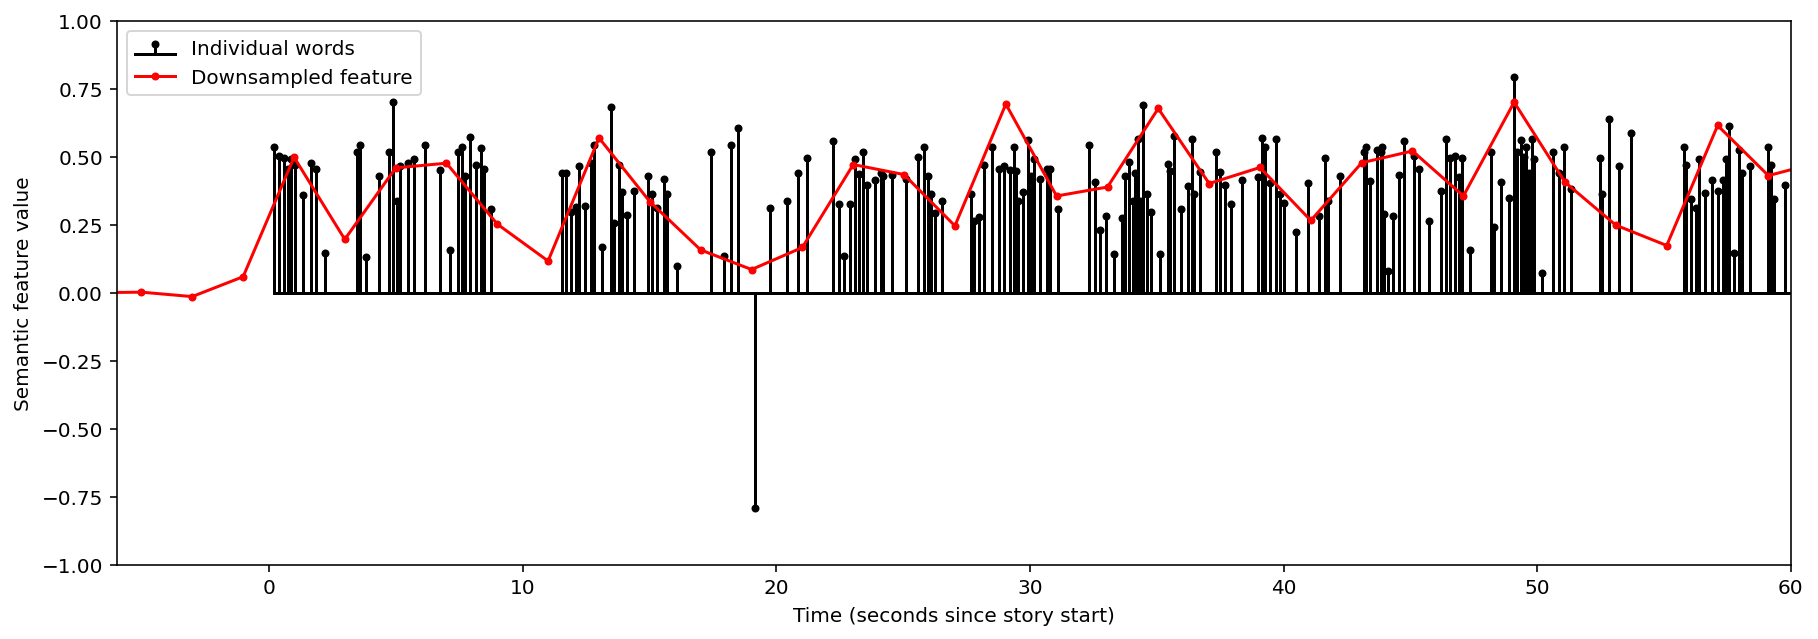

In [29]:
s_words = wordseqs["naked"]
s_sem = semanticseqs["naked"]
s_semdown = downsampled_semanticseqs["naked"]

f = figure(figsize=(15,5))
f.clf()
schan = 2
ax = f.add_subplot(1,1,1)
wordstems = ax.stem(s_words.data_times, 
                    s_sem[:,schan] / np.abs(s_sem[:,schan]).max(), 
                    linefmt="k-", markerfmt="k.", basefmt="k-")
interps = ax.plot(s_words.tr_times, 
                  s_semdown[:,schan] / np.abs(s_semdown[:,schan]).max(), 'r.-')
ax.set_xlim(-6, 60)
ax.set_ylim(-1, 1)
ax.set_xlabel("Time (seconds since story start)")
ax.set_ylabel("Semantic feature value")
ax.legend((wordstems, interps[0]), ("Individual words", "Downsampled feature"));


Concatenating features across stories

In [0]:
# Combine stimuli
from npp import zscore
trim = 5
Rstim = np.vstack([zscore(downsampled_semanticseqs[story][5+trim:-trim]) for story in Rstories])
Pstim = np.vstack([zscore(downsampled_semanticseqs[story][5+trim:-trim]) for story in Pstories])

In [31]:
# Print the sizes of these matrices
print ("Rstim shape: ", Rstim.shape)
print ("Pstim shape: ", Pstim.shape)

Rstim shape:  (3737, 768)
Pstim shape:  (291, 768)


Visualizing the combined stimuli

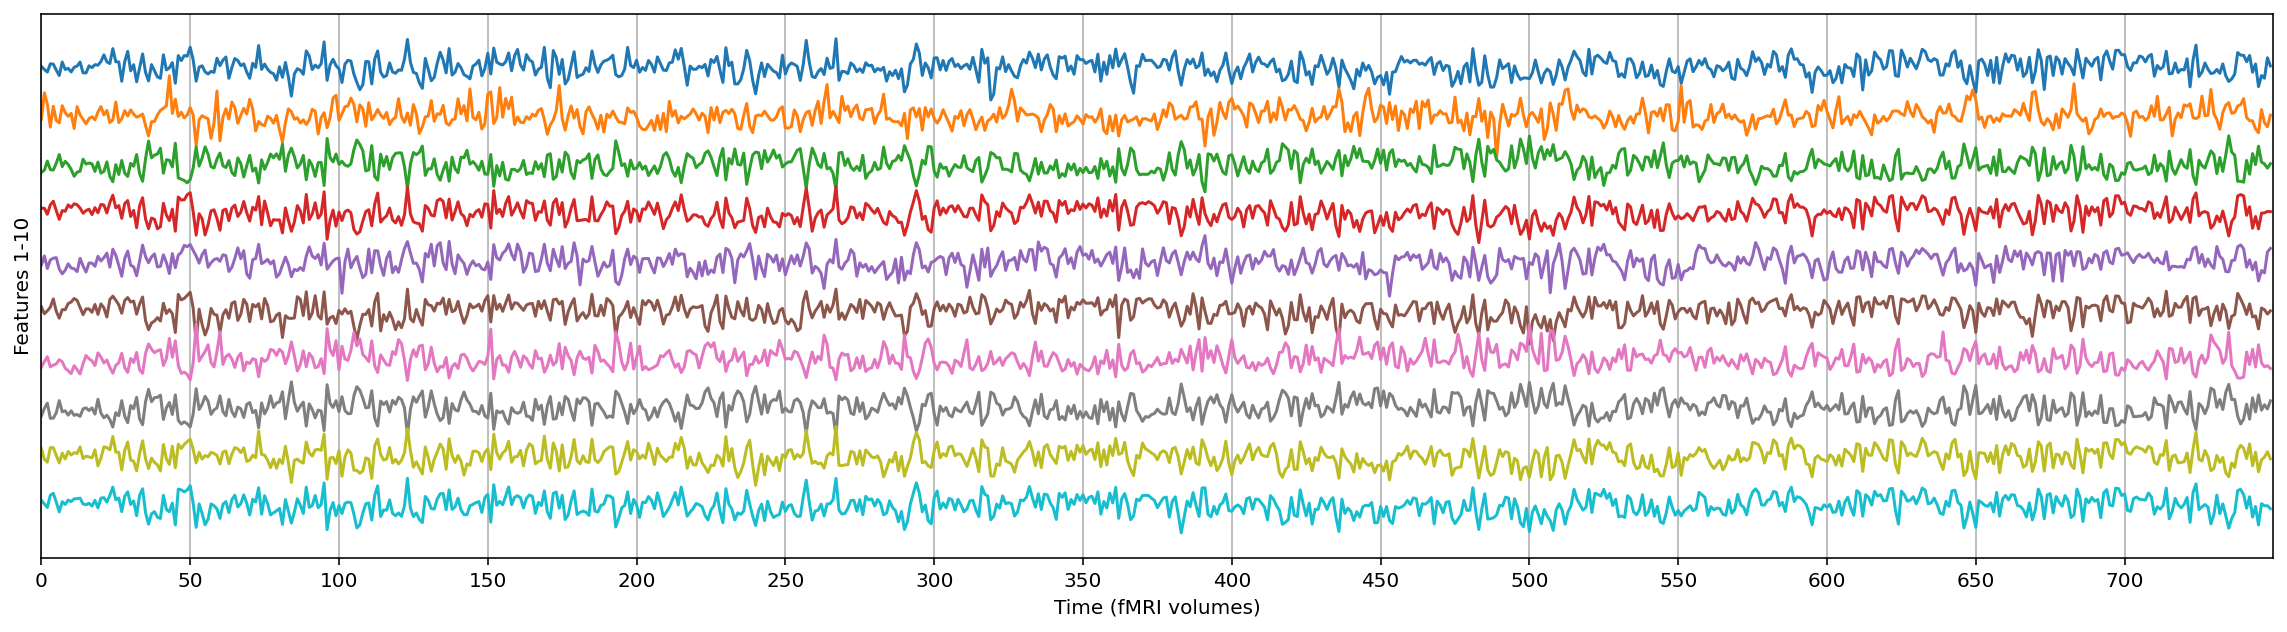

In [32]:
# Plot some of the combined stimuli
f = figure(figsize=(20, 5))
ax = f.add_subplot(1,1,1)

for ii in range(10):
    # Plot each feature, offset by 5 vertically so they are easier to see
    ax.plot(Rstim[:750,ii] - 5 * ii)

ax.set_xlim(0, 750)
ax.set_yticks([])
ax.set_xticks(range(0, 750, 50))
ax.set_xlabel("Time (fMRI volumes)")
ax.set_ylabel("Features 1-10")
ax.grid()

Concatenate delayed stimuli for FIR model

In [33]:
# Delay stimuli
from util import make_delayed
ndelays = 4
delays = range(1, ndelays+1)

print ("FIR model delays: ", delays)

delRstim = make_delayed(Rstim, delays)
delPstim = make_delayed(Pstim, delays)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


FIR model delays:  range(1, 5)


In [34]:
# Print the sizes of these matrices
print ("delRstim shape: ", delRstim.shape)
print ("delPstim shape: ", delPstim.shape)

delRstim shape:  (3737, 3072)
delPstim shape:  (291, 3072)


Visualizing FIR Features

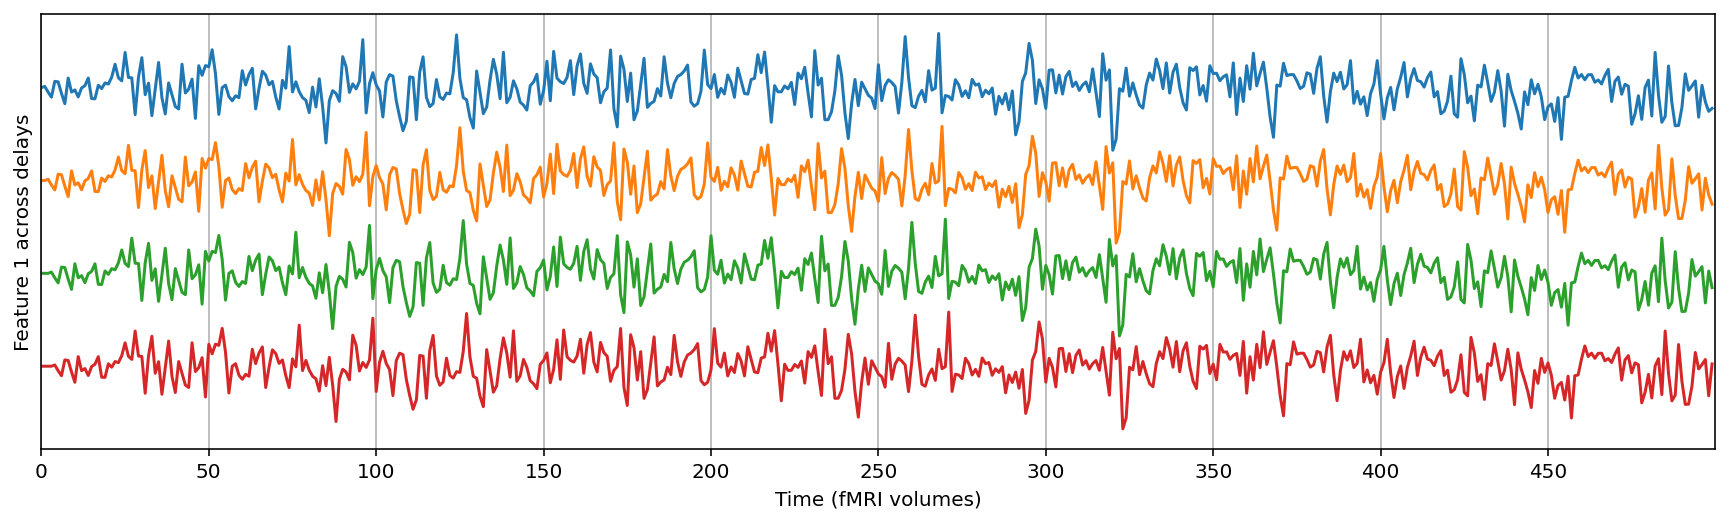

In [35]:
# Plot the same feature at different delays
f = figure(figsize=(15, 4))
ax = f.add_subplot(1,1,1)
for ii in range(ndelays):
    ax.plot(delRstim[:500, ii * Rstim.shape[1]] - 5 * ii)
ax.set_xlim(0, 500)
ax.set_yticks([])
ax.set_xticks(range(0, 500, 50))
ax.set_xlabel("Time (fMRI volumes)")
ax.set_ylabel("Feature 1 across delays")
ax.grid()

# Response Data

In [0]:
# Load responses
import tables
resptf = tables.open_file('fmri-responses.hf5')
zRresp = resptf.root.zRresp.read()
zPresp = resptf.root.zPresp.read()
mask = resptf.root.mask.read()

In [37]:
# Print matrix shapes
print ("zRresp shape (num time points, num voxels): ", zRresp.shape)
print ("zPresp shape (num time points, num voxels): ", zPresp.shape)
print ("mask shape (Z, Y, X): ", mask.shape)

zRresp shape (num time points, num voxels):  (3737, 37226)
zPresp shape (num time points, num voxels):  (291, 37226)
mask shape (Z, Y, X):  (31, 100, 100)


Visualizing the responses of few voxels over time

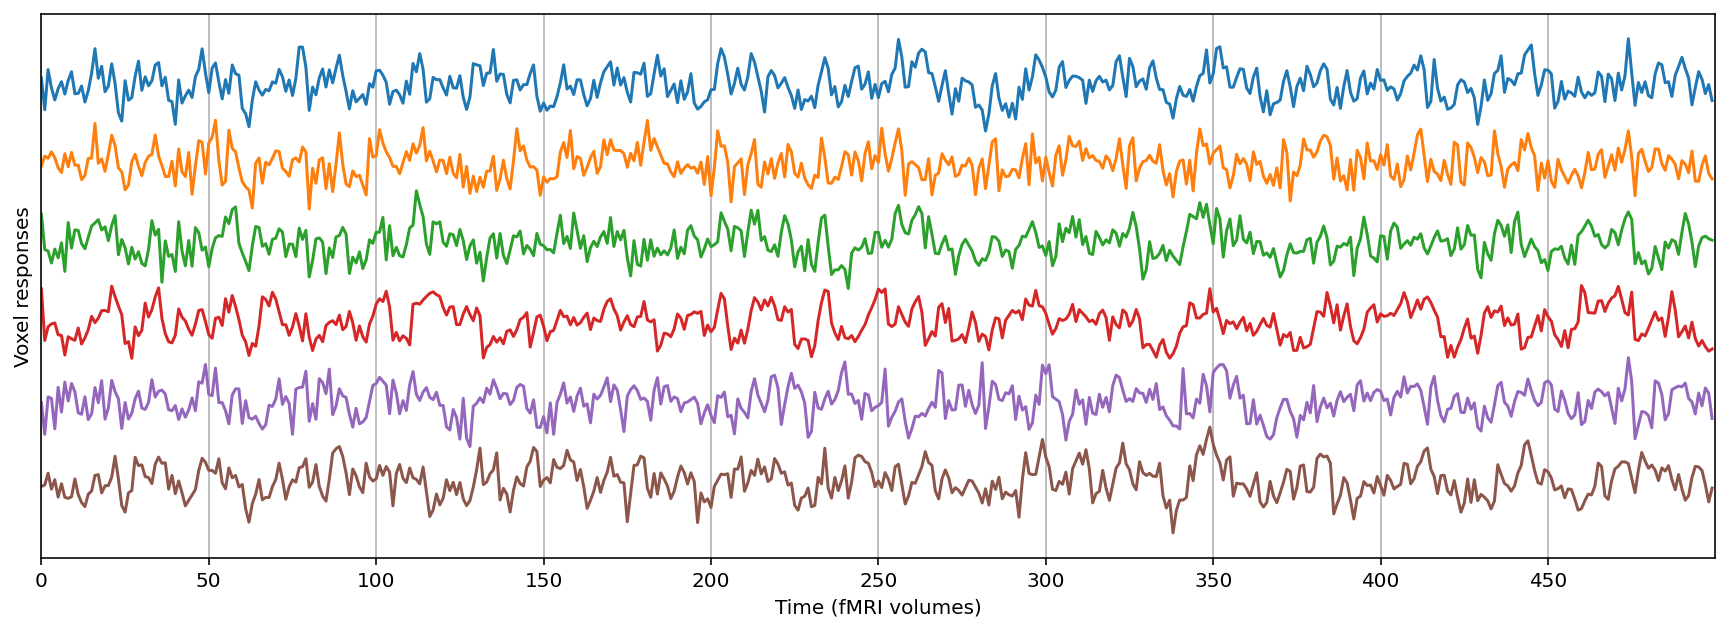

In [38]:
# Plot the response of a few voxels over time
selvoxels = [20710, 27627, 24344, 34808, 22423, 25397]

f = figure(figsize=(15, 5))
ax = f.add_subplot(1,1,1)
for ii,vi in enumerate(selvoxels):
    ax.plot(zRresp[:500, vi] - 5 * ii)
ax.set_xlim(0, 500)
ax.set_yticks([])
ax.set_xticks(range(0, 500, 50))
ax.set_xlabel("Time (fMRI volumes)")
ax.set_ylabel("Voxel responses")
ax.grid()

# Regression Model

In [39]:
# Run regression
from ridge import bootstrap_ridge
alphas = np.logspace(1, 3, 10) # Equally log-spaced alphas between 10 and 1000. The third number is the number of alphas to test.
nboots = 5 # Number of cross-validation runs.
chunklen = 40 # 
nchunks = 20

wt, corr, alphas, bscorrs, valinds = bootstrap_ridge(delRstim, zRresp, delPstim, zPresp,
                                                     alphas, nboots, chunklen, nchunks,
                                                     singcutoff=1e-10, single_alpha=True)

INFO:ridge_corr:Selecting held-out test set..
INFO:ridge_corr:Doing SVD...
INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (2937, 2937))
INFO:ridge_corr:Training stimulus has Frobenius norm: 1347.718
INFO:ridge_corr:Training: alpha=10.000, mean corr=0.02688, max corr=0.33702, over-under(0.20)=150
INFO:ridge_corr:Training: alpha=16.681, mean corr=0.02961, max corr=0.34672, over-under(0.20)=218
INFO:ridge_corr:Training: alpha=27.826, mean corr=0.03312, max corr=0.36733, over-under(0.20)=296
INFO:ridge_corr:Training: alpha=46.416, mean corr=0.03740, max corr=0.38423, over-under(0.20)=410
INFO:ridge_corr:Training: alpha=77.426, mean corr=0.04183, max corr=0.39607, over-under(0.20)=505
INFO:ridge_corr:Training: alpha=129.155, mean corr=0.04506, max corr=0.39824, over-under(0.20)=558
INFO:ridge_corr:Training: alpha=215.443, mean corr=0.04592, max corr=0.39353, over-under(0.20)=507
INFO:ridge_corr:Training: alpha=359.381, mean corr=0.04426, max corr=0.38515, over-under(0.20)=375
IN

Variables returned by the regression

In [40]:
# wt is the regression weights
print ("wt has shape: ", wt.shape)

# corr is the correlation between predicted and actual voxel responses in the Prediction dataset
print ("corr has shape: ", corr.shape)

# alphas is the selected alpha value for each voxel, here it should be the same across voxels
print ("alphas has shape: ", alphas.shape)

# bscorrs is the correlation between predicted and actual voxel responses for each round of cross-validation
# within the Regression dataset
print ("bscorrs has shape (num alphas, num voxels, nboots): ", bscorrs.shape)

# valinds is the indices of the time points in the Regression dataset that were used for each
# round of cross-validation
print ("valinds has shape: ", np.array(valinds).shape)

wt has shape:  (3072, 37226)
corr has shape:  (37226,)
alphas has shape:  (37226,)
bscorrs has shape (num alphas, num voxels, nboots):  (10, 37226, 5)
valinds has shape:  (5, 800)


Testing the regression model by predicting responses

In [41]:
# Predict responses in the Prediction dataset

# First let's refresh ourselves on the shapes of these matrices
print ("zPresp has shape: ", zPresp.shape)
print ("wt has shape: ", wt.shape)
print ("delPstim has shape: ", delPstim.shape)

zPresp has shape:  (291, 37226)
wt has shape:  (3072, 37226)
delPstim has shape:  (291, 3072)


In [42]:
# Then let's predict responses by taking the dot product of the weights and stim
pred = np.dot(delPstim, wt)

print ("pred has shape: ", pred.shape)


pred has shape:  (291, 37226)


Visualizing the predeicted and the actual responses

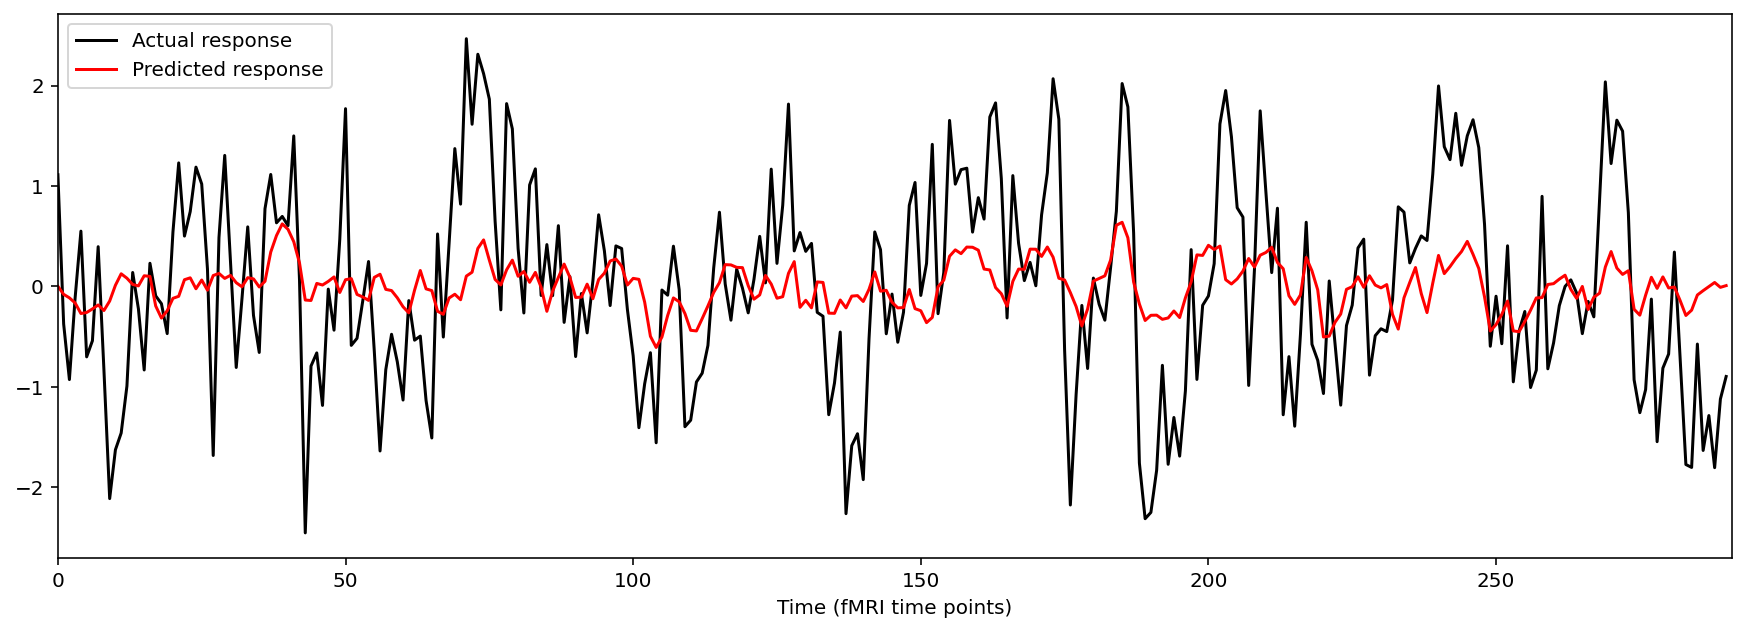

In [43]:
f = figure(figsize=(15,5))
ax = f.add_subplot(1,1,1)

selvox = 20710 # a decent voxel

realresp = ax.plot(zPresp[:,selvox], 'k')[0]
predresp = ax.plot(pred[:,selvox], 'r')[0]

ax.set_xlim(0, 291)
ax.set_xlabel("Time (fMRI time points)")

ax.legend((realresp, predresp), ("Actual response", "Predicted response"));

the predicted and actual responses look pretty different scale-wise, although the patterns of ups and downs are vaguely similar. But we don't really care about the scale -- for fMRI it's relatively arbitrary anyway, so let's rescale them both to have unit standard deviation and re-plot.

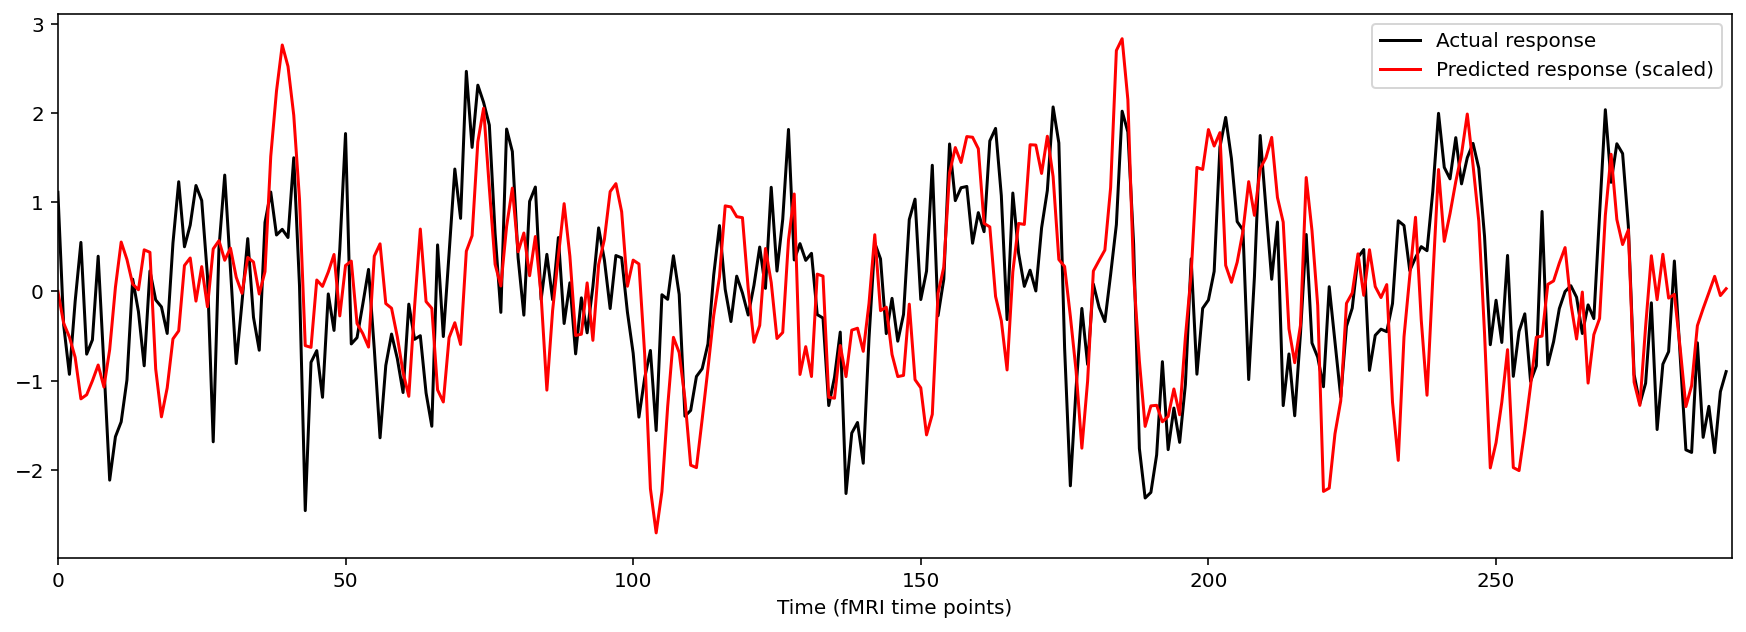

In [44]:
f = figure(figsize=(15,5))
ax = f.add_subplot(1,1,1)

selvox = 20710 # a good voxel

realresp = ax.plot(zPresp[:,selvox], 'k')[0]
predresp = ax.plot(zscore(pred[:,selvox]), 'r')[0]

ax.set_xlim(0, 291)
ax.set_xlabel("Time (fMRI time points)")

ax.legend((realresp, predresp), ("Actual response", "Predicted response (scaled)"));

In [45]:
# Compute correlation between single predicted and actual response
# (np.corrcoef returns a correlation matrix; pull out the element [0,1] to get 
# correlation between the two vectors)
voxcorr = np.corrcoef(zPresp[:,selvox], pred[:,selvox])[0,1]
print ("Correlation between predicted and actual responses for voxel %d: %f" % (selvox, voxcorr))

Correlation between predicted and actual responses for voxel 20710: 0.501531


In [46]:
np.mean(voxcorrs)

NameError: ignored

Visualizing the correleation across the brain

In [0]:
voxcorrs = np.zeros((zPresp.shape[1],)) # create zero-filled array to hold correlations
for vi in range(zPresp.shape[1]):
    voxcorrs[vi] = np.corrcoef(zPresp[:,vi], pred[:,vi])[0,1]

    
# Plot histogram of correlations
f = figure(figsize=(8,8))
ax = f.add_subplot(1,1,1)
ax.hist(voxcorrs, 100) # histogram correlations with 100 bins
ax.set_xlabel("Correlation")
ax.set_ylabel("Num. voxels");

In [0]:
# Plot mosaic of correlations
corrvolume = np.zeros(mask.shape)
corrvolume[mask>0] = voxcorrs

f = figure(figsize=(10,10))
cortex.mosaic(corrvolume, vmin=0, vmax=0.5, cmap=cm.hot);


# Plot correlations on cortex
import cortex
corrvol = cortex.Volume(corr, "S1","20110321S1_auto2", mask=mask)
# corrview = cortex.quickshow(corrvol, vmin=0, vmax=0.5, cmap='hot')
#cortex.webshow(corrview, port=8889, open_browser=False) # Won't work on nbviewer
cortex.quickshow(corrvol,with_rois=False, with_labels=False)
# cortex.quickshow(corrvolume,with_rois=False, with_labels=False)
# # Plot correlation flatmap
# # cortex.quickshow(corrview, with_rois=False, with_labels=False);
# # cotex

# LSTM Model